<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">

# Hotel Reservation Dataset

## Présentation du dataset

### Objectif du dataset

Le dataset contient les données de réservations en ligne des clients d'un hotel. **Le but de ce jeu de données est d'arriver à prédir si le client va respecter sa réservation ou l'annuler**.

### Description des données

* **Booking_ID** : unique identifier of each booking
* **no_of_adults** : Number of adults
* **no_of_children** : Number of Children
* **no_of_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan** : Type of meal plan booked by the customer:
* **required_car_parking_space** : Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved** : Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year** : Year of arrival date
* **arrival_month** : Month of arrival date
* **arrival_date** : Date of the month
* **market_segment_type** : Market segment designation.
* **repeated_guest** : Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations** : Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled** : Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room** : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests** : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status** : Flag indicating if the booking was canceled or not.



In [112]:
import pandas as pd 
import numpy as np


dataset = pd.read_csv('archive/Hotel Reservations.csv')
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [113]:
dataset.values.shape

(36275, 19)

# Analyse des données
ID à supprimer : pas pertinenent
<br>
Des variables à discrétiser : avg_price_per_room, lead_time, no_of_previous_bookings_not_canceled
<br>
Attention à certaines variables qui sont majoritairement nulles

In [114]:
def dataAnalysis(dataset):
    for series_name, series in dataset.items():
        #print(series_name)
        print("**************\n")
        print(series.value_counts())
        print("**************\n")
    

In [115]:
dataAnalysis(dataset)

**************

Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
**************

**************

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
**************

**************

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
**************

**************

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
**************

**************

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
**************

**************

type_of_meal_pla

In [144]:
# to execute only once
dataset = dataset.drop('Booking_ID',axis=1)
dataset = dataset.drop('no_of_previous_bookings_not_canceled',axis=1)
dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,4,2017,10,2,Offline,0,0,1.0,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,1,2018,11,6,Online,0,0,3.0,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,1.0,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,4,2018,5,20,Online,0,0,3.0,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,2,2018,4,11,Online,0,0,2.0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,3,2018,8,3,Online,0,0,4.0,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,4,2018,10,17,Online,0,0,2.0,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,4,2018,7,1,Online,0,0,2.0,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,3,2018,4,21,Online,0,0,2.0,0,Canceled


In [145]:
# Decomposition en quartile

def quartile(feature):
    prem_quartile = feature.quantile(0.25)
    de_quartile = feature.quantile(0.5)
    trois_quartile = feature.quantile(0.75)
    return (prem_quartile,de_quartile,trois_quartile)






# df.loc[df.C <= df.B, 'B':'E']
# quarter['avg_price_per_room'] = prem_quartile
# quarter





In [146]:
# Discrétistation des données


def discretisation(features,dataset):
    for feature in features:
        pQ,dQ,tQ = quartile(feature)
        dataset.loc[(feature <= pQ), feature.name] = 1
        dataset.loc[(feature > pQ) & (feature <= dQ), feature.name] = 2
        dataset.loc[(feature > dQ) & (feature <= tQ), feature.name] = 3
        dataset.loc[(feature > tQ), feature.name] = 4
    return dataset

In [147]:
continuFeatures = [dataset.avg_price_per_room,dataset.lead_time]
ds = discretisation(continuFeatures,dataset)

In [148]:
dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,4,2017,10,2,Offline,0,0,1.0,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,1,2018,11,6,Online,0,0,3.0,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,1.0,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,4,2018,5,20,Online,0,0,3.0,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,2,2018,4,11,Online,0,0,2.0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,3,2018,8,3,Online,0,0,4.0,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,4,2018,10,17,Online,0,0,2.0,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,4,2018,7,1,Online,0,0,2.0,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,3,2018,4,21,Online,0,0,2.0,0,Canceled


In [149]:
dataset.value_counts()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  required_car_parking_space  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  repeated_guest  no_of_previous_cancellations  avg_price_per_room  no_of_special_requests  booking_status
2             0               0                     2                  Meal Plan 2        0                           Room_Type 1         2          2017          8              14            Offline              0               0                             3.0                 0                       Not_Canceled      123
                                                                                                                                          3          2017          9              18            Offline              0               0                             3.0                 0                       Not_Canceled      113
1             0               0 

In [150]:
# Pre-process des données 


dataframe = dataset.sample(frac=1).reset_index(drop=True)



def train_test_dev_split(dataset):
    x_train = dataset.sample(frac=0.7)

    y_train = x_train['booking_status']
    
    x_test = dataset.drop(x_train.index,axis=0)
    
    y_test = x_test['booking_status']

    return (x_train,y_train,x_test,y_test)


x_train, y_train,x_test,y_test = train_test_dev_split(dataset)







In [151]:
# Detection des zeros pour préparer au classifieur bayesien naif
def zeroExistence(df):
    if (0 in df.values):
        return True
    return False

In [152]:
zeroExistence(dataset)

True

In [153]:
# Si zeros : +1 à toutes les données numériques

In [154]:
# Discretisation des données par la moyenne 

stats = x_train['avg_price_per_room'].describe()
slice = x_train.loc[x_train['avg_price_per_room'] <= 103.4]
slice

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
1430,1,0,2,0,Meal Plan 1,0,Room_Type 1,2,2018,9,11,Online,0,0,2.0,0,Not_Canceled
5953,2,0,1,2,Meal Plan 1,0,Room_Type 1,2,2018,9,16,Online,0,0,1.0,0,Canceled
12242,2,0,2,2,Meal Plan 1,0,Room_Type 1,3,2018,10,22,Offline,0,0,2.0,0,Not_Canceled
34594,1,0,0,2,Meal Plan 1,0,Room_Type 1,2,2017,10,28,Online,0,0,2.0,3,Not_Canceled
16588,2,0,0,2,Meal Plan 1,0,Room_Type 4,2,2018,10,5,Online,0,0,4.0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29255,2,0,2,3,Meal Plan 1,0,Room_Type 1,2,2017,12,25,Online,0,0,2.0,1,Not_Canceled
2341,2,0,2,1,Meal Plan 2,0,Room_Type 1,3,2017,7,11,Online,0,0,2.0,0,Canceled
1069,2,0,1,2,Meal Plan 1,0,Room_Type 1,3,2018,6,24,Online,0,0,2.0,0,Canceled
21627,2,0,1,3,Meal Plan 1,0,Room_Type 1,3,2018,4,25,Online,0,0,3.0,1,Not_Canceled


In [155]:
slice.keys

<bound method NDFrame.keys of        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
1430              1               0                     2                  0   
5953              2               0                     1                  2   
12242             2               0                     2                  2   
34594             1               0                     0                  2   
16588             2               0                     0                  2   
...             ...             ...                   ...                ...   
29255             2               0                     2                  3   
2341              2               0                     2                  1   
1069              2               0                     1                  2   
21627             2               0                     1                  3   
7360              3               0                     1                  3   

      typ

In [156]:
df2 = slice[['Booking_ID','avg_price_per_room']]
df2

KeyError: "['Booking_ID'] not in index"

# Création des tables de fréquences pour OneR


In [158]:
x_train['required_car_parking_space'].value_counts()

required_car_parking_space
0    24604
1      788
Name: count, dtype: int64

In [159]:
freq_table = pd.crosstab(x_train['no_of_children'], x_train['booking_status']) 
freq_table

booking_status,Canceled,Not_Canceled
no_of_children,,
0,7636,15868
1,387,757
2,315,414
3,2,10
9,1,1
10,0,1


In [160]:
freq_table[['Canceled']]

booking_status,Canceled
no_of_children,
0,7636
1,387
2,315
3,2
9,1
10,0


In [161]:
res = freq_table['Canceled'] + freq_table['Not_Canceled']
freq_table['Total'] = res
res

no_of_children
0     23504
1      1144
2       729
3        12
9         2
10        1
dtype: int64

In [162]:
freq_table

booking_status,Canceled,Not_Canceled,Total
no_of_children,,,
0,7636,15868,23504
1,387,757,1144
2,315,414,729
3,2,10,12
9,1,1,2
10,0,1,1


In [163]:


def frequency_table(data):
    freq_tables = []
    for series_name, series in data.items():
        if (series_name == "Booking_status"):
            pass
        freq_table = pd.crosstab(data[series_name], data['booking_status'])
        #freq_table.loc[:, 'Total'] = freq_table.loc[:,'Canceled'] + freq_table.loc[:,'Not_Canceled']
        freq_tables.append(freq_table)
    return freq_tables

 



In [201]:
print (freq)

[booking_status  Canceled  Not_Canceled  Vraisemblance
no_of_adults                                         
0                     25            62   7.808641e-09
1                   1295          4059   1.152942e-08
2                   6413         11880   6.046400e-10
3                    606          1040   9.717451e-09
4                      2            10   7.714083e-09, booking_status  Canceled  Not_Canceled  Vraisemblance
no_of_children                                       
0                   7636         15868   1.274669e-10
1                    387           757   7.305071e-09
2                    315           414   7.110992e-09
3                      2            10   6.649667e-09
9                      1             1   6.644527e-09
10                     0             1   6.643544e-09, booking_status        Canceled  Not_Canceled  Vraisemblance
no_of_weekend_nights                                       
0                         3598          8265   1.857651e-09
1      

In [234]:
freq = frequency_table(x_train)


io = 0
proba = [] 
for table in freq:
    table.iloc[0:,0:]+=1
    appt = table.iloc[0:] 
    print(appt)
    print("XXXX")
    app = appt[1]/(appt[1]+appt[0])
    vrais = [] 
    for i in range (len(table)): 
        if i>1 : 
            tx = table.head(i) 
            vrais.append(tx) 
        proba.append(vrais) 
            
    
#print (table)

booking_status  Canceled  Not_Canceled
no_of_adults                          
0                     26            63
1                   1296          4060
2                   6414         11881
3                    607          1041
4                      3            11
XXXX


KeyError: 1

In [225]:
print(table)

table.iloc[0:,0:]+=1
print(table)

booking_status  Canceled  Not_Canceled
booking_status                        
Canceled            8342             0
Not_Canceled           0         17053
booking_status  Canceled  Not_Canceled
booking_status                        
Canceled            8343             1
Not_Canceled           1         17054


In [195]:
def vrais(y):
    class_probs = {}
    X = len(y)

    for label in np.unique(y):
        class_probs[label] = np.sum(y == label) / X

In [ ]:
def app(x_train, y_train):

	for feature in len(x_train):

		for outcome in np.unique(y_train):
			outcome_count = sum(self.y_train == outcome)
			feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

			for feat_val, count in feat_likelihood.items():
				self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count


def _calc_predictor_prior(self):

	for feature in self.features:
		feat_vals = self.X_train[feature].value_counts().to_dict()

			for feat_val, count in feat_vals.items():
				self.pred_priors[feature][feat_val] = count/self.train_size

# Naive Bayes


In [167]:
def app(y):
    class_probs = {}
    X = len(y)

    for label in np.unique(y):
        class_probs[label] = np.sum(y == label) / X

    return class_probs


'def app(y):\n    class_probs = {}\n    X = len(y)\n\n    for label in np.unique(y):\n        class_probs[label] = np.sum(y == label) / X\n\n    return class_probs'

In [139]:
print(app(y_train))
x_train

TypeError: 'numpy.float64' object is not callable

In [140]:
def fit_naive_bayes(X_train, y_train):
    classes = np.unique(y_train)
    class_probs = {label: np.sum(y_train == label) / len(y_train) for label in classes}
    #print(class_probs)



    feature_probs = {}
    for label in classes:
        label_data = X_train[y_train == label]
        print(label_data)
        feature_probs[label] = {
            "mean": np.mean(label_data,axis=0),
            "std": np.std(label_data) + 1e-10
        }
    print(feature_probs)

    return class_probs, feature_probs


# Prédiction sur de nouvelles données (X_test)
#X_test = np.random.rand(10, 20)  # Exemple de nouvelles données
predictions = predict_naive_bayes(x_test, class_probs, feature_probs)

print("Predictions:", predictions)


NameError: name 'predict_naive_bayes' is not defined

In [ ]:
def calculate_mean(data):
    return np.mean(data, axis=0)

# Exemple d'utilisation
class_data = np.array([[1, 2, 3], [4, 50, 6], [7, 8, 9]])
mean_vector = calculate_mean(x_train)

print("Mean Vector:", mean_vector)

In [ ]:
import sys
sys.setrecursionlimit(15000)

# Sklearn 

In [238]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy.stats import norm

df = pd.read_csv('archive/Hotel Reservations.csv').drop(['Booking_ID'], axis='columns')
df.head()



,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [239]:
for column in df:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

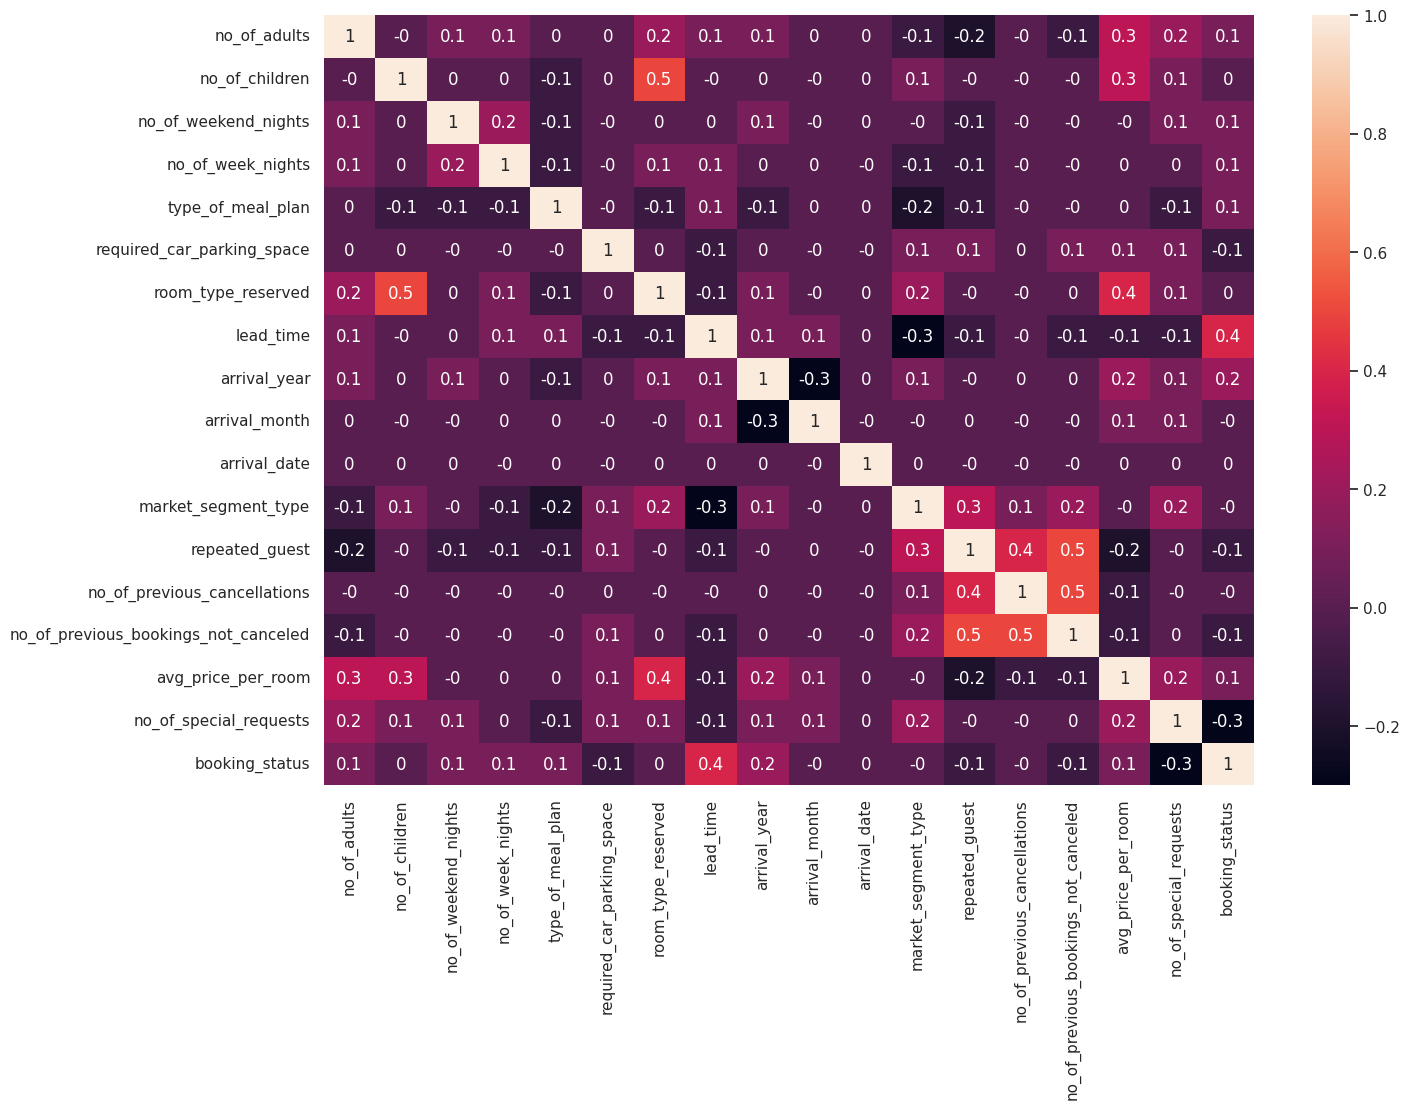

In [240]:


sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(round(df.corr(), 1), annot=True);



In [241]:


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1],
                                                    test_size=0.2)



In [242]:
model = GaussianNB()
model.fit(X_train, y_train)
accuracy = metrics.accuracy_score(model.predict(X_test), y_test)
print(f"Test accuracy = {accuracy}")


Test accuracy = 0.45196416264645073


In [243]:
columns_means = X_train.groupby(y_train).agg('mean')
columns_stds = X_train.groupby(y_train).agg('std')
apriori_probs = X_train.groupby(y_train).apply(lambda x: len(x) / X_train.shape[0])
apriori_probs

booking_status
0    0.674018
1    0.325982
dtype: float64

In [244]:


labels = [0, 1]
predictions = []
for elem_index in range(X_test.shape[0]):
    temp_pred = np.array([0., 0.])
    for label in labels:
        temp_pred[label] = apriori_probs.iloc[label]
        for col_index, col_name in enumerate(X_test.iloc[elem_index]):
            temp_pred[label] *= norm.pdf(
                col_name,
                columns_means.iloc[label, col_index],
                columns_stds.iloc[label, col_index]
            )
    predictions.append(temp_pred.argmax())



In [245]:
print(f"accuracy - {metrics.accuracy_score(y_test, predictions)}")

accuracy - 0.45196416264645073
